# Question 1

A spam filter in an email system aims to identify whether an incoming email is spam or not. The filter is not perfect and may produce false positives and false negatives. The characteristics of the filter are as follows:

• The probability of classifying a legitimate email as spam is 0.01.

• The probability of classifying a spam email as not spam is 0.05.

• The prevalence of spam emails in the system is 0.03.


What is the probability that an email classified as spam is actually spam?

In [11]:
P_legit_as_spam = 0.01  # P(Classified as Spam | Legitimate)
P_spam_as_not_spam = 0.05  # P(Classified as Not Spam | Spam)
P_spam = 0.03  # Prevalence of Spam
P_legit = 1 - P_spam

# P(Classified as Spam | Spam) = 1 - P(Classified as Not Spam | Spam)
P_classified_spam_given_spam = 1 - P_spam_as_not_spam

# P(Classified as Spam) = P(Classified as Spam | Spam)*P(Spam) + P(Classified as Spam | Legitimate)*P(Legitimate)
P_classified_spam = P_classified_spam_given_spam * P_spam + P_legit_as_spam * P_legit

# P(Spam | Classified as Spam)
P_spam_given_classified_spam = P_classified_spam_given_spam * P_spam / P_classified_spam
    
P_spam_given_classified_spam

0.7460732984293194

---

# Question 2

Mary has been trying to have a baby and suspects she is pregnant. She tests positive. What is the probability that Mary is pregnant P(pregnant | positive test)? Assumptions:

– The probability of true positive is 99%

– The probability of false positive is 2%

– Only women who suspect they might be pregnant take a test. So prior P(pregnant) = 0.2


a) Calculate the answer using Bayes’ theorem.

b) Check your answer using PyAgrum.

In [12]:
P_true_positive = 0.99  # P(Positive | Pregnant)
P_false_positive = 0.02  # P(Positive | Not Pregnant)
P_pregnant = 0.2  # P(Pregnant)
P_not_pregnant = 1 - P_pregnant

# P(Positive) = P(Positive | Pregnant)*P(Pregnant) + P(Positive | Not Pregnant)*P(Not Pregnant)
P_positive = P_true_positive * P_pregnant + P_false_positive * P_not_pregnant

# P(Pregnant | Positive)
P_pregnant_given_positive = P_true_positive * P_pregnant / P_positive
    
P_pregnant_given_positive

0.9252336448598131

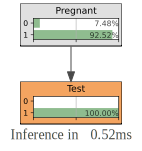

In [13]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Create a Bayesian Network
bn = gum.BayesNet("PregnancyTest")

# Add nodes
bn.add(gum.LabelizedVariable("Pregnant", "Is the woman pregnant?", 2))  # 0: No, 1: Yes
bn.add(gum.LabelizedVariable("Test", "Result of the test", 2))  # 0: Negative, 1: Positive

# Add arcs
bn.addArc("Pregnant", "Test")

# Set conditional probabilities
bn.cpt("Pregnant").fillWith([0.8, 0.2])  # P(Pregnant)
bn.cpt("Test")[{"Pregnant": 0}] = [0.98, 0.02]  # P(Test | Not Pregnant)
bn.cpt("Test")[{"Pregnant": 1}] = [0.01, 0.99]  # P(Test | Pregnant)

# Run the inference computation
gnb.showInference(bn, evs={"Test": 1})

---

# Question 3

In PyAgrum, create a Bayes network for a car electrical system using the following causal diagram, and the probability tables listed below:

In [14]:
import pyAgrum as gum

# Create a Bayesian Network named 'Car'
car_bn = gum.BayesNet('Car')

# Add nodes for Battery
battery = car_bn.add(gum.LabelizedVariable('Battery', 'Battery', 2))
car_bn.cpt(battery).fillWith([0.1, 0.9])

# Add nodes for Lights
lights = car_bn.add(gum.LabelizedVariable('Lights', 'Lights', 2))
car_bn.addArc(battery, lights)
car_bn.cpt(lights)[{'Battery': 0}] = [1.0, 0.0]
car_bn.cpt(lights)[{'Battery': 1}] = [0.05, 0.95]

# Add nodes for Gas
gas = car_bn.add(gum.LabelizedVariable('Gas', 'Gas', 2))
car_bn.cpt(gas).fillWith([0.25, 0.75])

# Add nodes for Ignition
ignition = car_bn.add(gum.LabelizedVariable('Ignition', 'Ignition', 2))
car_bn.addArc(battery, ignition)
car_bn.cpt(ignition)[{'Battery': 0}] = [1.0, 0.0]
car_bn.cpt(ignition)[{'Battery': 1}] = [0.1, 0.9]

# Add nodes for Engine Starts
engine_starts = car_bn.add(gum.LabelizedVariable('EngineStarts', 'Engine Starts', 2))
car_bn.addArc(ignition, engine_starts)
car_bn.addArc(gas, engine_starts)
car_bn.cpt(engine_starts)[{'Ignition': 0, 'Gas': 0}] = [1, 0]
car_bn.cpt(engine_starts)[{'Ignition': 0, 'Gas': 1}] = [1, 0]
car_bn.cpt(engine_starts)[{'Ignition': 1, 'Gas': 0}] = [1, 0]
car_bn.cpt(engine_starts)[{'Ignition': 1, 'Gas': 1}] = [0.05, 0.95]

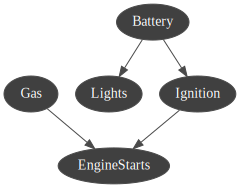

In [15]:
gnb.showBN(car_bn)

In [16]:
gnb.sideBySide(car_bn.cpt(battery), car_bn.cpt(gas), car_bn.cpt(ignition))
gnb.sideBySide(car_bn.cpt(engine_starts), car_bn.cpt(lights))

a) Compute the posterior probability that the car will start, assuming that we observe the lights turning on.

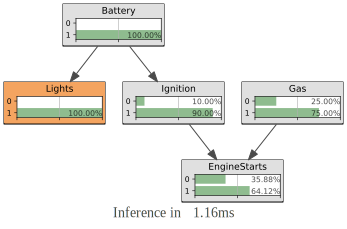

In [17]:
gnb.showInference(car_bn, evs={"Lights": 1})

b) Compute the posterior probability that the car will start, assuming both that the lights are on and that the car has sufficient gas.

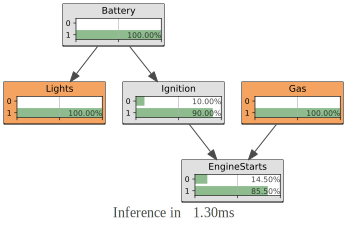

In [18]:
gnb.showInference(car_bn, evs={"Lights": 1, "Gas": 1})